In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()
x = np.linspace(0, 10, 1000)
for i in range(3):
    ax.plot(x,np.cos(i*x))
    fig.canvas.draw()
    fig.canvas.flush_events()

D:\program\adjoint_method\Lumopt\Utilities\plotter.py:12: UserWarning: Ignoring file format 'png' which is not supported by Snapshots; using rgba instead.
  super().__init__(*args, extra_args = (), **kwargs) # stop None from being passed
Exception ignored in: <function FileMovieWriter.__del__ at 0x000001D6F84F7C10>
Traceback (most recent call last):
  File "D:\Anaconda\envs\lumopt\lib\site-packages\matplotlib\animation.py", line 444, in __del__
    if self._tmpdir:
AttributeError: 'Snapshots' object has no attribute '_tmpdir'


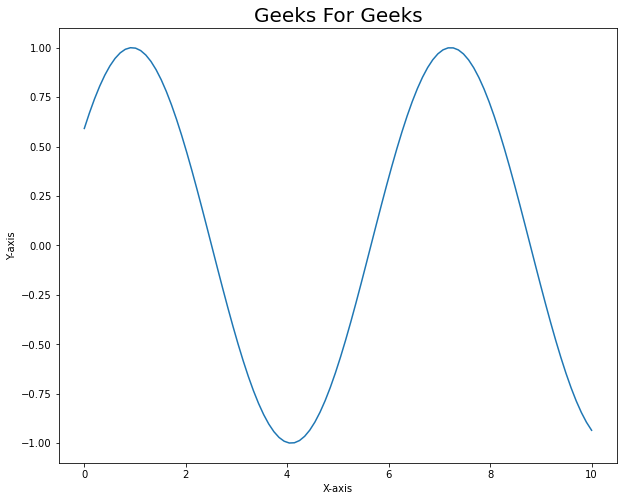

In [4]:
# importing libraries
import numpy as np
import time
import matplotlib.pyplot as plt
from Utilities.plotter import Snapshots
 
snapshot = Snapshots(fps = 2)

# creating initial data values
# of x and y
x = np.linspace(0, 10, 100)
y = np.sin(x)

# to run GUI event loop
plt.ion()

# here we are creating sub plots
figure, ax = plt.subplots(figsize=(10, 8))
line1, = ax.plot(x, y)

# setting title
plt.title("Geeks For Geeks", fontsize=20)

# setting x-axis label and y-axis label
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
#snapshot.setup(figure, test.png)
# Loop
for _ in range(50):
	# creating new Y values
	new_y = np.sin(x-0.5*_)

	# updating data values
	line1.set_xdata(x)
	line1.set_ydata(new_y)

	# drawing updated values
	figure.canvas.draw()

	# This will run the GUI event
	# loop until all UI events
	# currently waiting have been processed
	figure.canvas.flush_events()

	time.sleep(0.1)


In [ ]:
import matplotlib
a = 1


In [6]:
import lumapi
h = lumapi.FDTD()
h.addfdtd()
h.haveproperty('use legacy conformal interface detection')
h.set('use legacy conformal interface detection', True)

In [9]:
h.haveproperty('meshing tolerance')

1.0

In [4]:
h.set('use legacy conformal interface detection', False)

In [5]:
h.close()